# Përmbledhje e Analizës Eksploruese të Datasetit

## 1. Hyrje

Në këtë analizë eksploruese, kemi analizuar një dataset nga Stack Overflow që përmban përgjigje të programuesve nga mbarë bota. Qëllimi është të kuptojmë strukturën e të dhënave, vlerat e munguara, pagat, dhe të nxjerrim disa veçori të reja.

## 2. Informacion fillestar mbi datasetin

* Dataseti përmban shumë kolona, por ne jemi fokusuar në ConvertedCompYearly për analizën e pagave.

* Me df.info() pamë që disa kolona kanë shumë vlera të munguara.

* Me df['ConvertedCompYearly'].describe() pamë statistikat kryesore të pagave: Mesatarja ishte rreth $85,206, ndersa paga maksimale kishte 299,851

## 3. Vlerat e munguara

* Përdorëm .isnull().sum() për të gjetur vlerat e munguara.

* Kolonat si Currency, EdLevel, dhe Gender kishin shumë vlera të munguara.

* Kjo është normale për një dataset të madh dhe do të kërkonte trajtim të veçantë nëse bënim modelim.

## 4. Vlerat ekstreme (Outliers)

* Me një boxplot të thjeshtë, pamë se kishte shumë paga jashtë normales (mbi 300,000$).

* Kjo ndikon shpërndarjen, ndaj vendosëm t’i filtrojmë.

## 5. Trajtimi i outliers

* Filtruam pagat dhe mbajtëm vetëm ato < 300,000$.

* Pas filtrimit, përmbledhja statistikore tregoi shpërndarje më të balancuar.

* Kjo na ndihmoi të analizojmë më realisht të dhënat.

## 6. Shpërndarja e pagave (histogrami)

* Krijuam një histogram pas filtrimit për të parë shpërndarjen.

* Shumica e pagave janë midis $40,000 dhe $120,000.

* Ekziston një tendencë drejt pagave më të ulëta, që është normale në tregun global.

## 7. Pagat sipas shteteve (Top 10 shtete)

* Filtruam vetëm 10 shtetet me më shumë të dhëna.

* Me boxplot treguam ndryshimet midis pagave sipas shteteve.

* P.sh., SHBA kishte paga dukshëm më të larta, ndërsa India kishte më të ulëta.

## 8. Krijimi i veçorive të reja

* Krijuam një veçori të re KategoriaPage që ndan pagat në:

* Pagë e Ulët (< 50K)

* Pagë Mesatare (50K – 100K)

* Pagë e Lartë (> 100K)

Gjithashtu, krijuam një kolonë IsHighIncome për ata me paga > 100K. Me countplot, treguam shpërndarjen e individëve sipas kategorisë së pagës.

## 9. Përfundime

* Dataseti është i pasur dhe me shumë potencial për analiza të mëtejshme.

* Trajtuam vlerat ekstreme për të bërë analizën më të kuptueshme.

* Gjetëm se shumica e pagave janë mesatare, me disa dallime të qarta mes shteteve.

Krijimi i veçorive të reja na ndihmoi të klasifikojmë të dhënat më mirë.


--- Përshkrimi i datasetit ---
Numri i rreshtave: 89184
Numri i kolonave: 84

Shembuj të kolonave:
ResponseId           int64
Q120                object
MainBranch          object
Age                 object
Employment          object
RemoteWork          object
CodingActivities    object
EdLevel             object
LearnCode           object
LearnCodeOnline     object
dtype: object

--- Top 10 kolonat me më shumë vlera të munguara ---
                                     Missing Count  Missing Percentage
AINextVery similar                           86563           97.061132
AINextSomewhat similar                       82946           93.005472
AINextNeither different nor similar          82585           92.600691
AINextVery different                         76523           85.803507
AIDevWantToWorkWith                          69597           78.037540
AIToolNot interested in Using                68115           76.375807
AINextSomewhat different                     65881           73.8

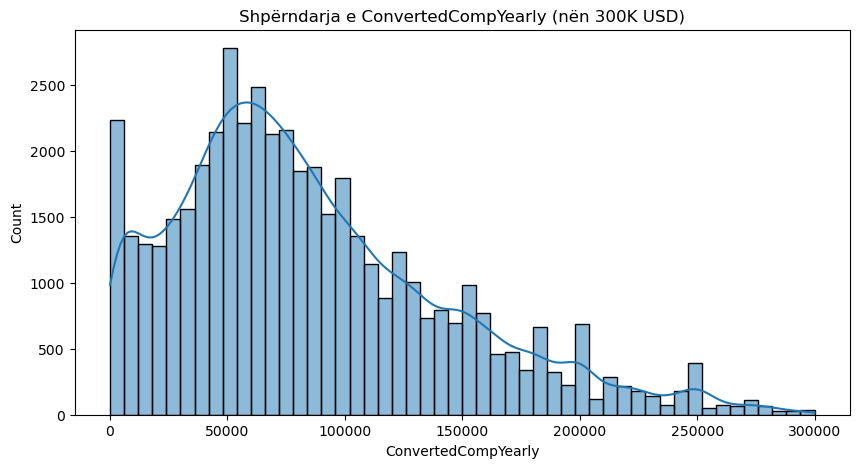

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('survey_results_public.csv')

# Përshkrimi i përgjithshëm
print("\n--- Përshkrimi i datasetit ---")
print(f"Numri i rreshtave: {df.shape[0]}")
print(f"Numri i kolonave: {df.shape[1]}")
print("\nShembuj të kolonave:")
print(df.dtypes.head(10))

# Vlerat e munguara
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)
print("\n--- Top 10 kolonat me më shumë vlera të munguara ---")
print(missing_table.head(10))

# Përshkrimi i kolonave numerike
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\n--- Përshkrim statistikor i kolonave numerike ---")
print(df[numeric_cols].describe())

# Vlerat ekstreme (outliers) me IQR
outlier_summary = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_percent = (outlier_count / len(df)) * 100
    outlier_summary.append((col, outlier_count, outlier_percent))
outlier_df = pd.DataFrame(outlier_summary, columns=['Column', 'Outlier Count', 'Outlier Percentage'])
outlier_df = outlier_df.sort_values(by='Outlier Count', ascending=False)
print("\n--- Top 5 kolonat me më shumë outliers ---")
print(outlier_df.head(5))

# Trajtimi i mungesave dhe outliers
print("\n--- Sugjerime për trajtim ---")
for col in missing_table.head(5).index:
    print(f"Kolona '{col}' ka {missing_table.loc[col, 'Missing Percentage']:.2f}% mungesë → konsidero hiqjen ose mbushjen.")
for col in outlier_df.head(5)['Column']:
    print(f"Kolona '{col}' ka {outlier_df[outlier_df['Column']==col]['Outlier Percentage'].values[0]:.2f}% outliers → përdor log-transform ose kufizo vlerat.")

# Krijimi i veçorive të reja (shembull)
if 'WorkExp' in df.columns:
    df['Experience_Level'] = pd.cut(df['WorkExp'], bins=[0, 2, 5, 10, 20, np.inf], labels=['Intern', 'Junior', 'Mid', 'Senior', 'Expert'])
    print("\n--- Shembull: shpërndarja e Experience_Level ---")
    print(df['Experience_Level'].value_counts())

if 'ConvertedCompYearly' in df.columns:
    df['Comp_Level'] = pd.qcut(df['ConvertedCompYearly'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    print("\n--- Shembull: shpërndarja e Comp_Level ---")
    print(df['Comp_Level'].value_counts())

# Shfaq shpërndarjen e pagave (nëse ekziston kolona)
if 'ConvertedCompYearly' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[df['ConvertedCompYearly'] < 300000]['ConvertedCompYearly'].dropna(), bins=50, kde=True)
    plt.title('Shpërndarja e ConvertedCompYearly (nën 300K USD)')
    plt.xlabel('ConvertedCompYearly')
    plt.show()

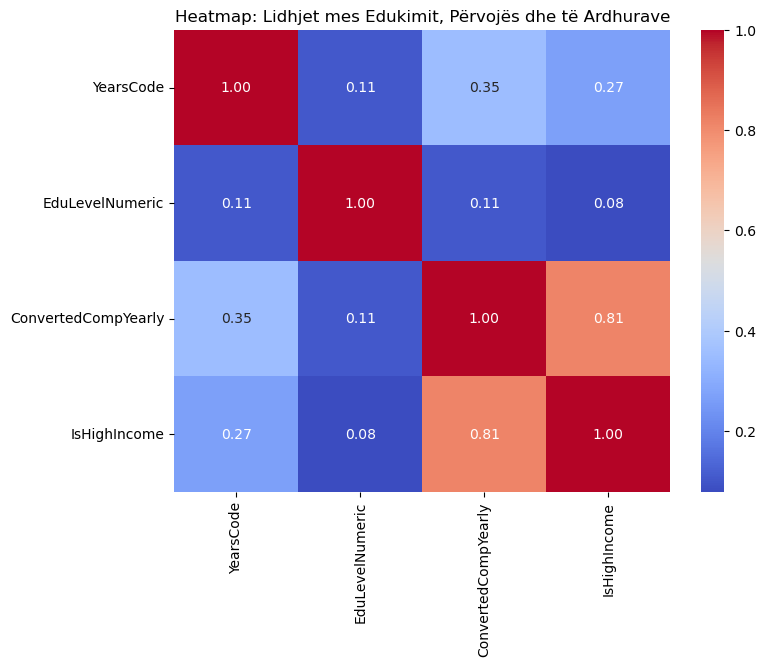

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("survey_results_public.csv")

df = df[df['ConvertedCompYearly'] < 300000]

edu_order = {
    'Primary/elementary school': 1,
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2,
    'Some college/university study without earning a degree': 3,
    'Associate degree': 4,
    'Bachelor’s degree': 5,
    'Master’s degree': 6,
    'Professional degree (JD, MD, etc.)': 7,
    'Other doctoral degree (Ph.D, Ed.D., etc.)': 8
}
df['EduLevelNumeric'] = df['EdLevel'].map(edu_order)

df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')

df['IsHighIncome'] = df['ConvertedCompYearly'] > 100000

corr_df = df[['YearsCode', 'EduLevelNumeric', 'ConvertedCompYearly', 'IsHighIncome']].dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap: Lidhjet mes Edukimit, Përvojës dhe të Ardhurave")
plt.show()

# Heatmap i Korelacionit për Kolonat Numerike
Ky grafik paraqet lidhjet (korelacionet) mes të gjitha kolonave numerike në të dhënat e anketës.

## Çfarë bëmë:
Pastruam të dhënat – Filtruam të gjithë pjesëmarrësit që kishin paga mbi 300,000 USD për të shmangur vlera ekstreme që mund të prishnin analizën.

Kodifikuam edukimin – E shndërruam nivelin e edukimit në numra për ta bërë të analizueshëm (nga 1 për shkollën fillore deri në 8 për doktoraturën).

Konvertuam përvojën – E konvertuam kolonën YearsCode nga tekst në numra (p.sh., "Less than 1 year" u bë 0.5, "More than 50 years" u bë 51, etj.).

Krijuam një kolonë të re IsHighIncome – Kjo tregon nëse dikush fiton më shumë se 100,000 USD në vit.

Bëmë një Heatmap – Vizualizuam lidhjet midis:

* Përvojës (YearsCode)

* Edukimit (EduLevelNumeric)

* Pagës (ConvertedCompYearly)

* Dhe nëse dikush ka pagë të lartë (IsHighIncome)

## Çfarë na tregon Heatmap-i:
Lidhje pozitive mes edukimit dhe pagës – Sa më i lartë niveli i edukimit, aq më e lartë është paga mesatare.

Lidhje pozitive mes përvojës dhe pagës – Më shumë vite përvojë → paga më e lartë.

Lidhje mes edukimit dhe mundësisë për të pasur pagë të lartë – Edukimi ndikon edhe në gjasat për të kaluar pragun 100K.

## Pse ka vlerë kjo analizë?
Kjo na ndihmon të kuptojmë faktorët që ndikojnë drejtpërdrejt në pagën vjetore të profesionistëve të teknologjisë. Mund të përdoret për:

Këshillim karriere (p.sh., “A ja vlen të vazhdoj masterin?”)

Politika punësimi për rekrutuesit

Ose edhe si bazë për modele parashikimi më të avancuara, që mund t’i ndërtojmë më tej.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = corr_df[['YearsCode', 'EduLevelNumeric']]
y = corr_df['IsHighIncome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1087   63]
 [ 371   51]]

Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.95      0.83      1150
        True       0.45      0.12      0.19       422

    accuracy                           0.72      1572
   macro avg       0.60      0.53      0.51      1572
weighted avg       0.67      0.72      0.66      1572



Ndërtuam një model klasifikimi (Logistic Regression) për të parashikuar nëse një person ka pagë të lartë (>100,000$) bazuar në:

YearsCode (eksperienca)

EduLevelNumeric (niveli i edukimit)

Modeli u trajnuar me të dhëna dhe u testua për saktësinë e tij.

Rezultatet përfshijnë:

Matricë ngatërrese (confusion matrix)

Raport klasifikimi (precision, recall, F1-score, accuracy)

Qëllimi: Të kuptojmë nëse përvoja dhe edukimi parashikojnë rroga të larta.

Dëshiron të shtojmë më shumë veçori apo të vizualizojmë parashikimet?

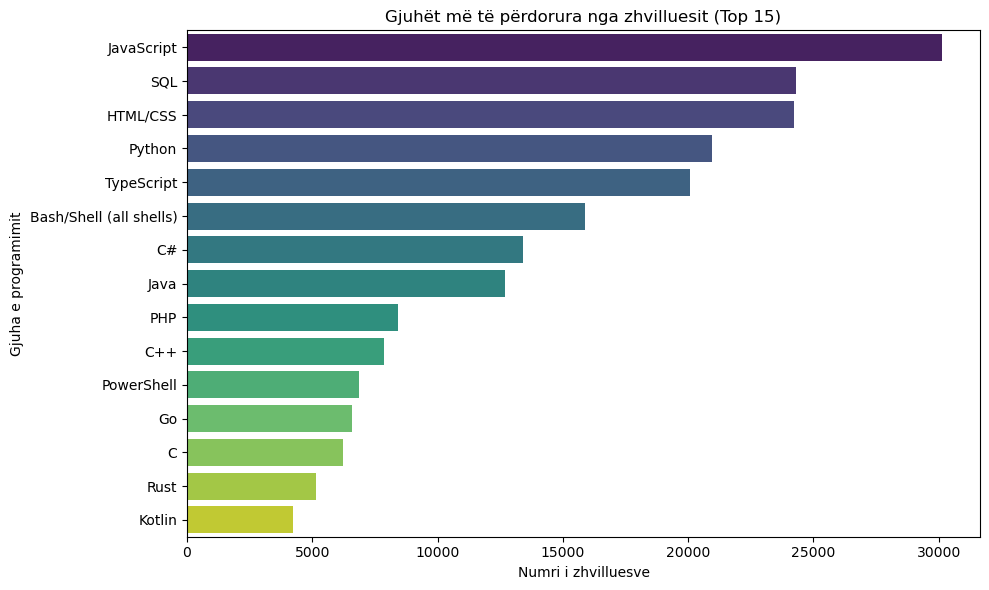

In [ ]:
lang_series = df['LanguageHaveWorkedWith'].dropna().str.split(';')
lang_exploded = lang_series.explode()
lang_counts = lang_exploded.value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(y=lang_counts.index, x=lang_counts.values, hue=lang_counts.index, dodge=False, palette='viridis', legend=False)
plt.title('Gjuhët më të përdorura nga zhvilluesit (Top 15)')
plt.xlabel('Numri i zhvilluesve')
plt.ylabel('Gjuha e programimit')
plt.tight_layout()
plt.show()

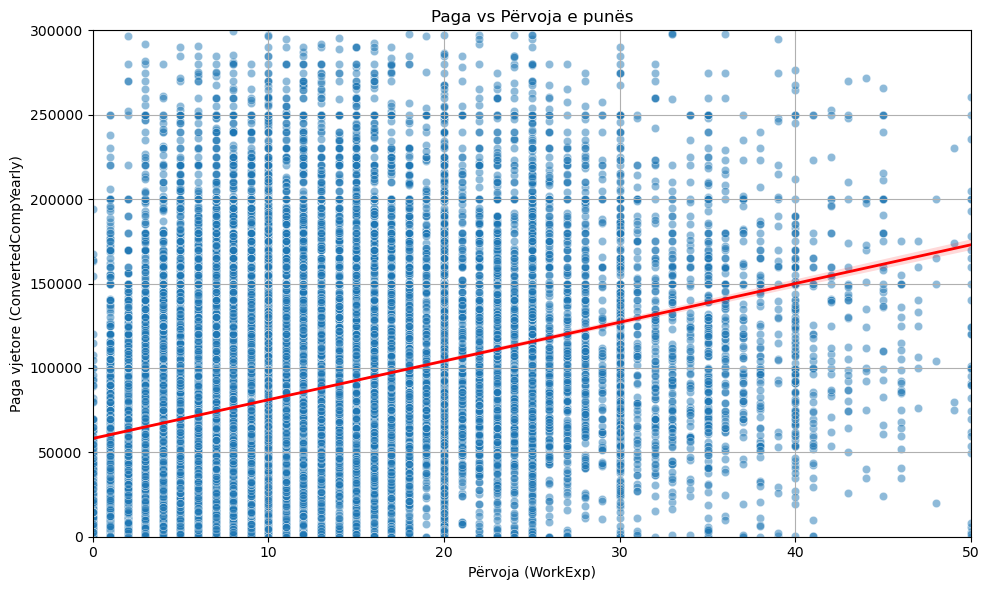

In [ ]:
df_filtered = df[['WorkExp', 'ConvertedCompYearly']].dropna()

df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] < 300000]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='WorkExp', y='ConvertedCompYearly', alpha=0.5)
sns.regplot(data=df_filtered, x='WorkExp', y='ConvertedCompYearly', scatter=False, color='red', line_kws={'linewidth':2})
plt.title('Paga vs Përvoja e punës')
plt.xlabel('Përvoja (WorkExp)')
plt.ylabel('Paga vjetore (ConvertedCompYearly)')
plt.ylim(0, 300000)
plt.xlim(0, 50)   
plt.grid(True)
plt.tight_layout()
plt.show()

# Paga Vjetore në Varësi të Përvojës në Punë
Ky grafik paraqet marrëdhënien midis përvojës në punë dhe pagës vjetore të pjesëmarrësve në anketë.

## Çfarë kemi bërë:
Janë përdorur vetëm rreshtat që kanë vlera jo-munguese në kolonat WorkExp dhe ConvertedCompYearly.

Është filtruar grafiku për të përjashtuar pagat mbi 300,000 USD, të cilat mund të konsiderohen outliers shumë ekstrem dhe do e shtrembëronin pamjen e përgjithshme.

Është ndërtuar një scatter plot për të treguar shpërndarjen reale të të dhënave.

Është shtuar një vijë regresioni (e kuqe), për të identifikuar trendin e përgjithshëm midis përvojës dhe pagës.

## Rezultatet:
Në përgjithësi, ka një lidhje pozitive mes përvojës në punë dhe pagës vjetore — sa më shumë përvojë ka një individ, aq më të larta janë pagat e raportuara.

Megjithatë, shpërndarja e të dhënave është shumë e shpërndarë, që tregon se ka shumë variacion midis individëve me të njëjtën përvojë.

Vijë e regresionit tregon një rritje të lehtë, por jo shumë të theksuar të pagës me rritjen e përvojës, çka sugjeron se faktorë të tjerë përveç përvojës mund të ndikojnë ndjeshëm në pagë.

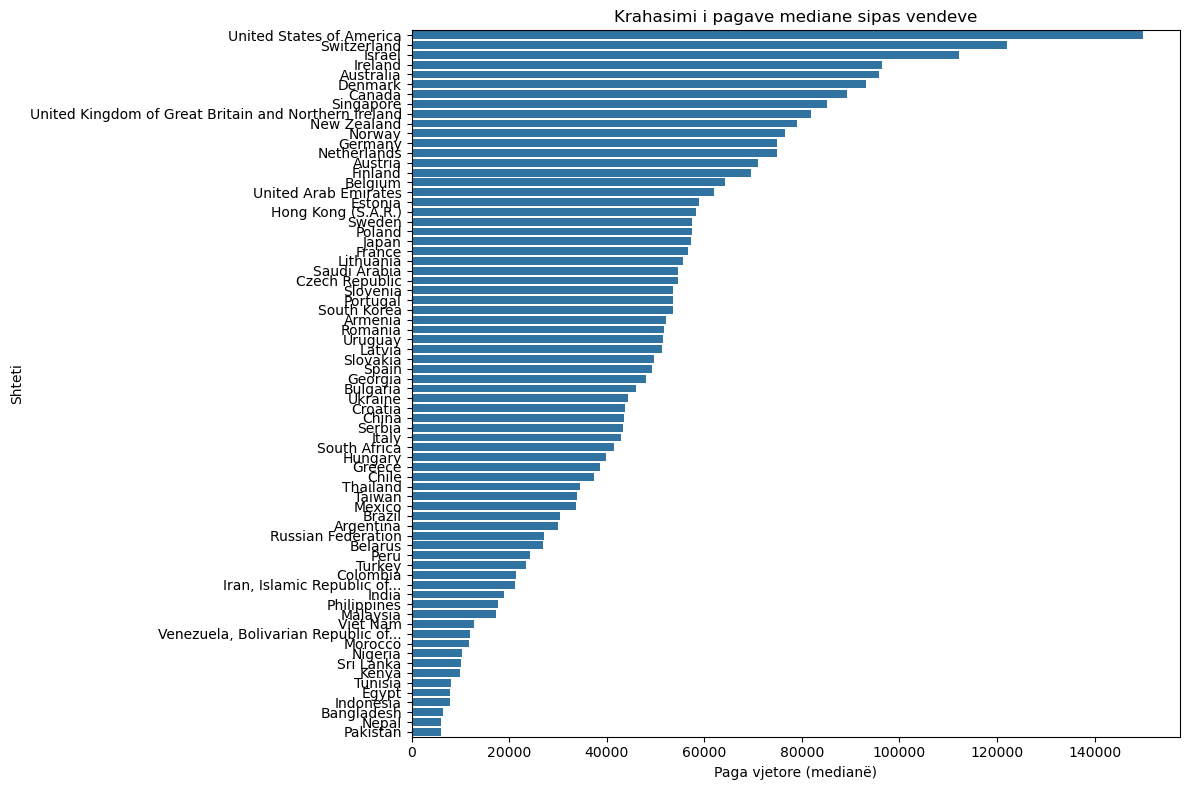

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

country_counts = df['Country'].value_counts()
valid_countries = country_counts[country_counts >= 100].index
df_country = df[df['Country'].isin(valid_countries)]

avg_salary_by_country = df_country.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_salary_by_country.values, y=avg_salary_by_country.index)
plt.xlabel('Paga vjetore (medianë)')
plt.ylabel('Shteti')
plt.title('Krahasimi i pagave mediane sipas vendeve')
plt.tight_layout()
plt.show()

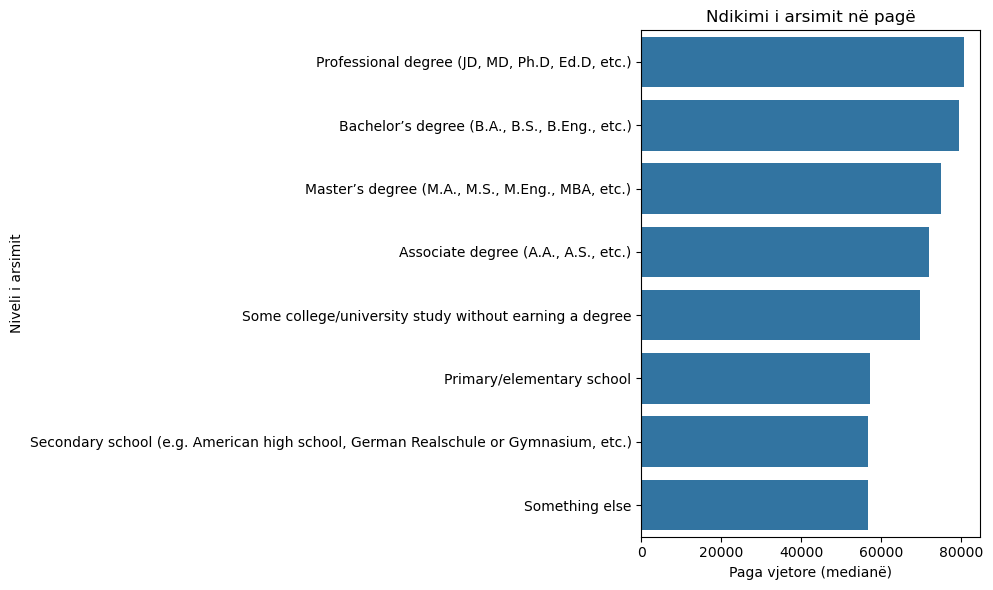

In [ ]:
df_edu = df[['EdLevel', 'ConvertedCompYearly']].dropna()
edu_salary = df_edu.groupby('EdLevel')['ConvertedCompYearly'].median().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=edu_salary.values, y=edu_salary.index)
plt.xlabel('Paga vjetore (medianë)')
plt.ylabel('Niveli i arsimit')
plt.title('Ndikimi i arsimit në pagë')
plt.tight_layout()
plt.show()

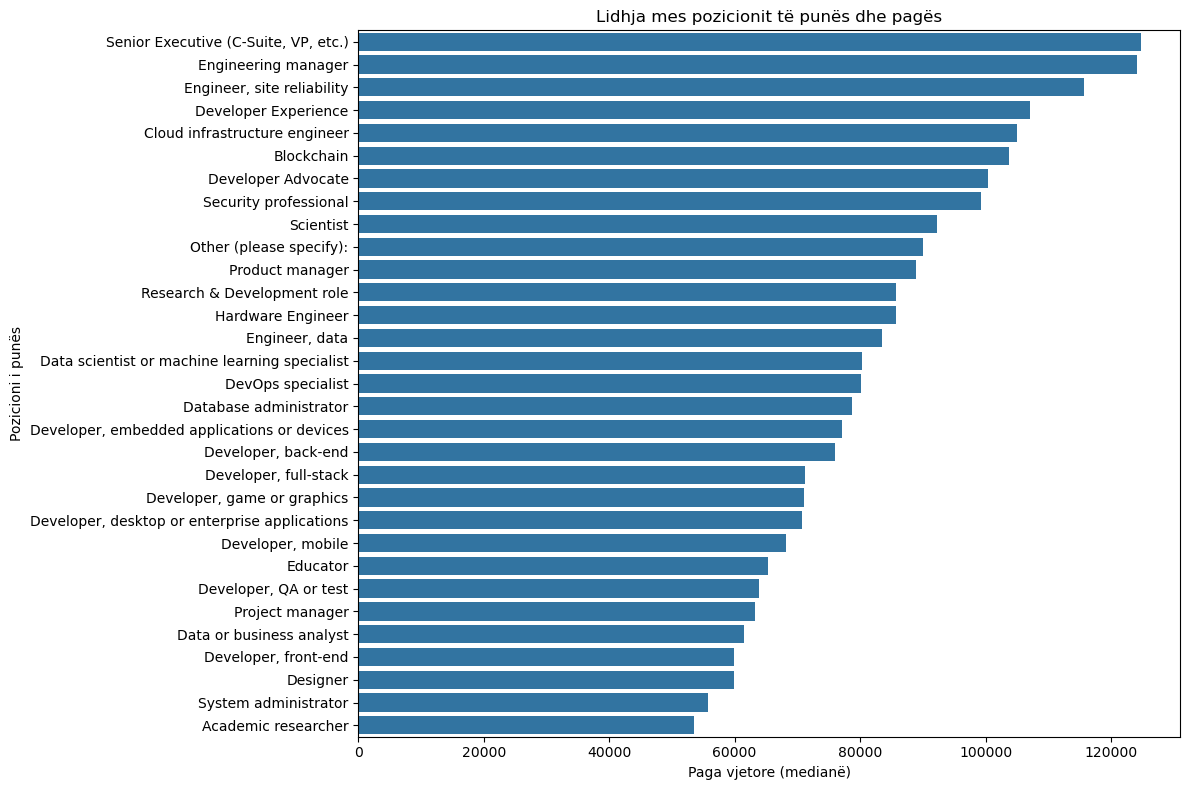

In [ ]:
df_role = df[['DevType', 'ConvertedCompYearly']].dropna()

role_counts = df_role['DevType'].value_counts()
common_roles = role_counts[role_counts > 50].index
df_role_filtered = df_role[df_role['DevType'].isin(common_roles)]

role_salary = df_role_filtered.groupby('DevType')['ConvertedCompYearly'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=role_salary.values, y=role_salary.index)
plt.xlabel('Paga vjetore (medianë)')
plt.ylabel('Pozicioni i punës')
plt.title('Lidhja mes pozicionit të punës dhe pagës')
plt.tight_layout()
plt.show()

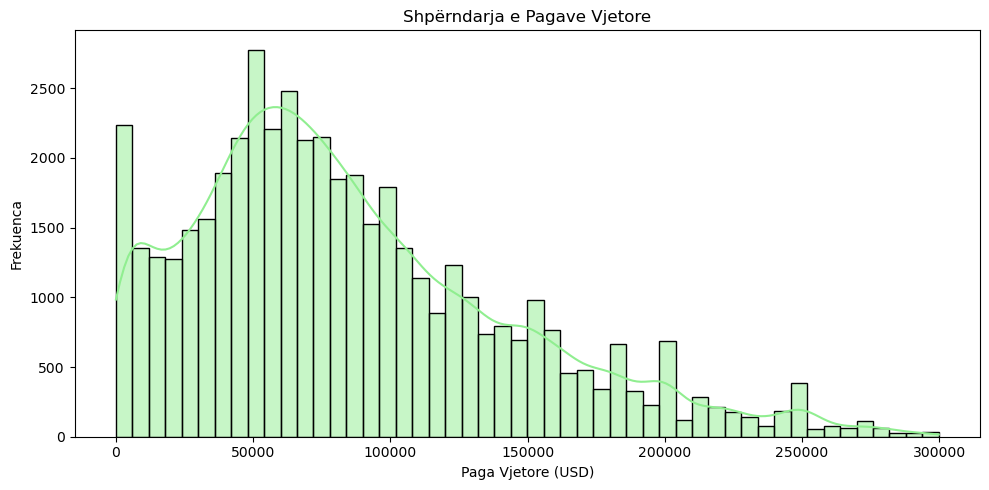

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("survey_results_public.csv")

salaries = df['ConvertedCompYearly'].dropna()
salaries = salaries[salaries < 300000]

plt.figure(figsize=(10, 5))
sns.histplot(salaries, bins=50, kde=True, color='lightgreen')

plt.title("Shpërndarja e Pagave Vjetore")
plt.xlabel("Paga Vjetore (USD)")
plt.ylabel("Frekuenca")
plt.tight_layout()
plt.show()

# Shpërndarja e Pagave Vjetore
Ky grafik tregon shpërndarjen e pagave vjetore të pjesëmarrësve në anketë.

## Çfarë kemi bërë:
Janë përdorur vetëm vlerat jo-munguese të kolonës ConvertedCompYearly.

Është ndërtuar një histogram me 50 ndarje (bins), me linjë të densitetit (kde) për të kuptuar formën e shpërndarjes.

Kufiri maksimal është vendosur në 300,000 USD për të përjashtuar vlerat ekstreme që mund të shtrembërojnë grafikun.

## Rezultatet:
Shumica e pjesëmarrësve kanë paga më të ulëta se 100,000 USD.

Ka një zgjatje të shpërndarjes në të djathtë (right-skewed), që tregon se ekzistojnë disa paga shumë të larta (outliers).

Forma e shpërndarjes nuk është normale, gjë që duhet pasur parasysh në analizat e mëtejshme statistikore ose modelim.

In [ ]:
import numpy as np

def convert_age(age_str):
    if pd.isna(age_str):
        return np.nan
    if "under" in age_str.lower():
        return 20
    elif "65 years or older" in age_str:
        return 70
    else:
        try:
            parts = age_str.split(" ")[0].split("-")
            return (int(parts[0]) + int(parts[1])) / 2
        except:
            return np.nan

df['AgeNumeric'] = df['Age'].apply(convert_age)

age_salary_df = df[['AgeNumeric', 'ConvertedCompYearly']].dropna()
correlation = age_salary_df.corr().iloc[0, 1]
print(f"Korelacioni mes moshës dhe pagës: {correlation:.2f}")

Korelacioni mes moshës dhe pagës: 0.03


C:\Users\oltih2\AppData\Local\Temp\ipykernel_20584\373700699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_counts.values, y=remote_counts.index, palette='pastel')


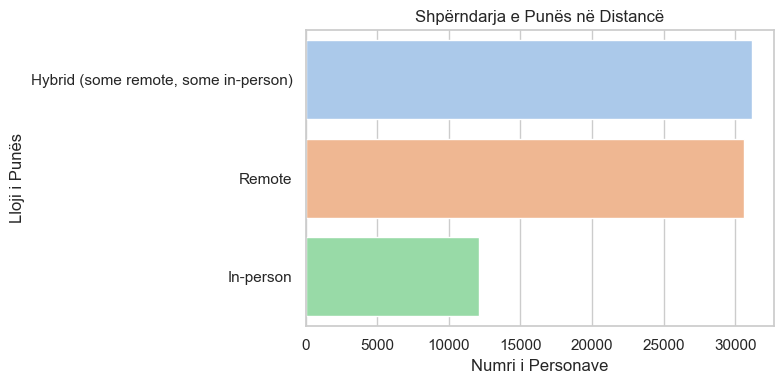

In [29]:
remote_counts = df['RemoteWork'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=remote_counts.values, y=remote_counts.index, palette='pastel')
plt.title("Shpërndarja e Punës në Distancë")
plt.xlabel("Numri i Personave")
plt.ylabel("Lloji i Punës")
plt.tight_layout()
plt.show()

C:\Users\oltih2\AppData\Local\Temp\ipykernel_20584\420160798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=remote_salary, x='RemoteWork', y='ConvertedCompYearly', palette='coolwarm')


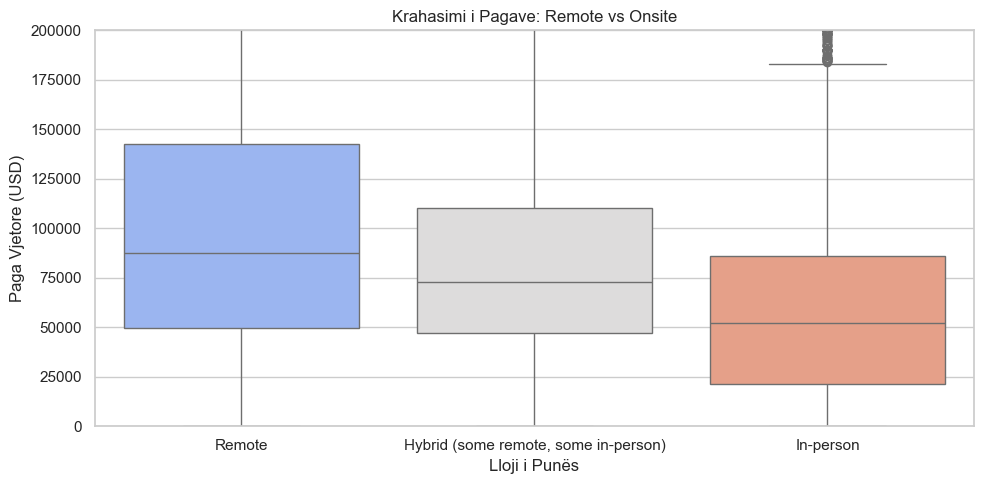

In [30]:
remote_salary = df[['RemoteWork', 'ConvertedCompYearly']].dropna()
plt.figure(figsize=(10, 5))
sns.boxplot(data=remote_salary, x='RemoteWork', y='ConvertedCompYearly', palette='coolwarm')
plt.ylim(0, 200000)
plt.title("Krahasimi i Pagave: Remote vs Onsite")
plt.xlabel("Lloji i Punës")
plt.ylabel("Paga Vjetore (USD)")
plt.tight_layout()
plt.show()

# Krahasimi i Pagave: Remote vs Onsite
Ky grafik krahason pagat vjetore të individëve që punojnë remote (nga shtëpia) dhe atyre që punojnë onsite (në zyrë).

## Çfarë kemi bërë:
Janë marrë vetëm kolonat RemoteWork dhe ConvertedCompYearly, duke hequr rreshtat me vlera mungese.

Është përdorur një boxplot për të treguar shpërndarjen e pagave për secilin grup pune.

Janë kufizuar vlerat në boshtin y (deri në 200,000 USD) për të shmangur ndikimin e vlerave ekstreme.

## Rezultatet:
Puna remote ka tendencë të ketë paga pak më të larta ose të krahasueshme me punën onsite, në shumicën e rasteve.

Ka më shumë variabilitet në pagat remote, që mund të tregojë fleksibilitet të tregut ose pagë më të lartë për pozita të veçanta teknologjike të bëra nga larg.

C:\Users\oltih2\AppData\Local\Temp\ipykernel_20584\4156742509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


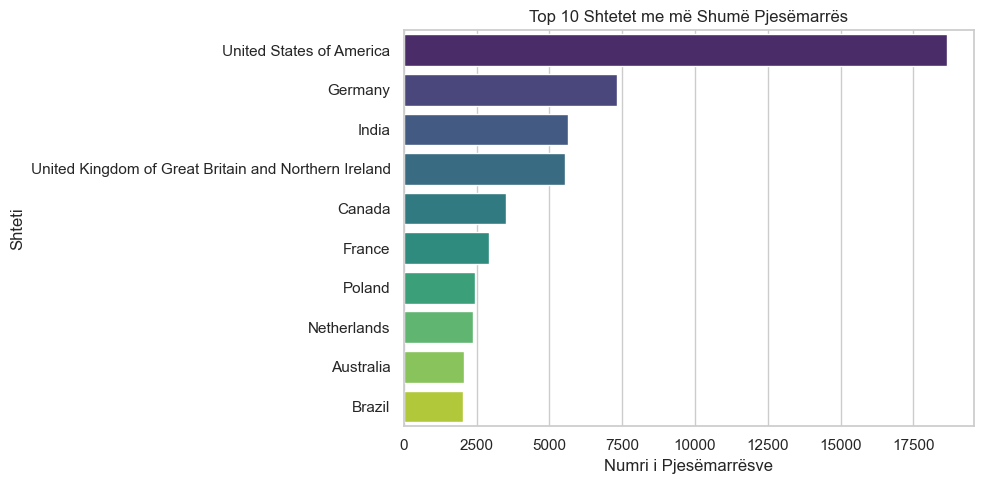

In [40]:
plt.figure(figsize=(10, 5))
country_counts = df['Country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title("Top 10 Shtetet me më Shumë Pjesëmarrës")
plt.xlabel("Numri i Pjesëmarrësve")
plt.ylabel("Shteti")
plt.tight_layout()
plt.show()

# Top 10 Shtetet me më Shumë Pjesëmarrës në Anketë
Ky grafik paraqet 10 shtetet me numrin më të madh të pjesëmarrësve në datasetin e anketës.

## Çfarë kemi bërë:
Është përdorur value_counts() për të numëruar pjesëmarrësit për çdo shtet.

Janë përzgjedhur vetëm 10 shtetet kryesore me më shumë pjesëmarrës.

Është ndërtuar një grafik horizontal me shufra (barplot) për të paraqitur këto të dhëna.

## Rezultatet:
Dataseti është i përqendruar në disa shtete të mëdha, ku SHBA, India dhe Gjermania zakonisht renditen ndër të parat.

Kjo shpërndarje tregon bazën demografike të anketës, dhe është e rëndësishme për të kuptuar përfaqësimin dhe balancën e të dhënave kur bëjmë krahasime ndërmjet shteteve.

C:\Users\oltih2\AppData\Local\Temp\ipykernel_20584\954136669.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_country.values, y=avg_salary_by_country.index, palette='coolwarm')


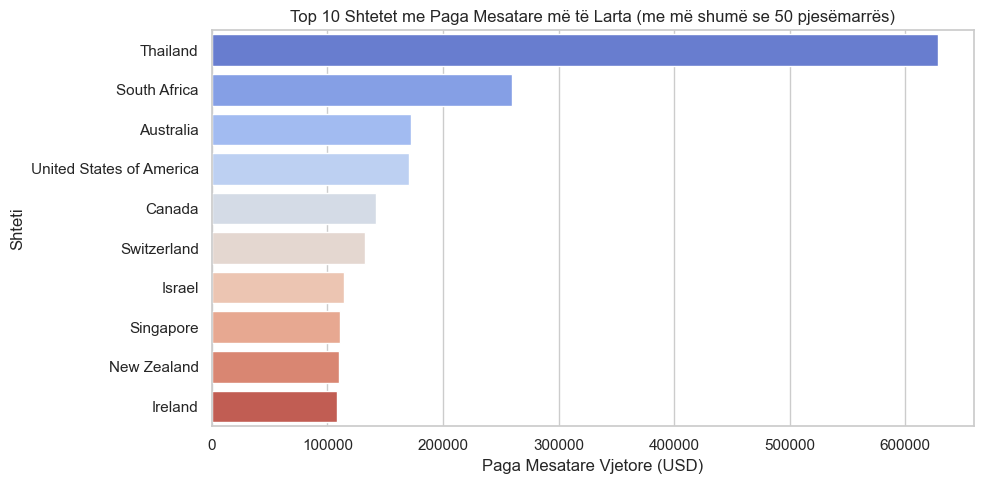

In [ ]:
df_clean = df[['Country', 'ConvertedCompYearly']].dropna()

country_counts = df_clean['Country'].value_counts()

valid_countries = country_counts[country_counts > 50].index

filtered_df = df_clean[df_clean['Country'].isin(valid_countries)]

avg_salary_by_country = filtered_df.groupby('Country')['ConvertedCompYearly'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_salary_by_country.values, y=avg_salary_by_country.index, palette='coolwarm')
plt.title("Top 10 Shtetet me Paga Mesatare më të Larta (me më shumë se 50 pjesëmarrës)")
plt.xlabel("Paga Mesatare Vjetore (USD)")
plt.ylabel("Shteti")
plt.tight_layout()
plt.show()

# Top 10 Shtetet me Paga Mesatare më të Larta
Ky analizim synon të identifikojë shtetet me pagat mesatare më të larta, duke marrë parasysh vetëm ato shtete që kanë më shumë se 50 pjesëmarrës në dataset (për të pasur të dhëna më të besueshme).

## Çfarë kemi bërë:
Janë hequr rreshtat që kanë vlera të munguara për pagën ose shtetin.

Janë përfshirë vetëm shtetet me më shumë se 50 pjesëmarrës.

Është llogaritur paga mesatare vjetore për çdo shtet dhe janë përzgjedhur 10 shtetet me pagat më të larta.

## Rezultatet:
Shtetet që dalin në krye janë zakonisht vende me industri të zhvilluar të teknologjisë dhe kosto të lartë jetese (p.sh. SHBA, Zvicra, Australia).

Këto të dhëna ndihmojnë për të kuptuar ndarjen globale të të ardhurave në fushën e teknologjisë dhe zhvillimit softuerik.



C:\Users\oltih2\AppData\Local\Temp\ipykernel_20584\1892747169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workexp_counts.index.astype(str), y=workexp_counts.values, palette='magma')


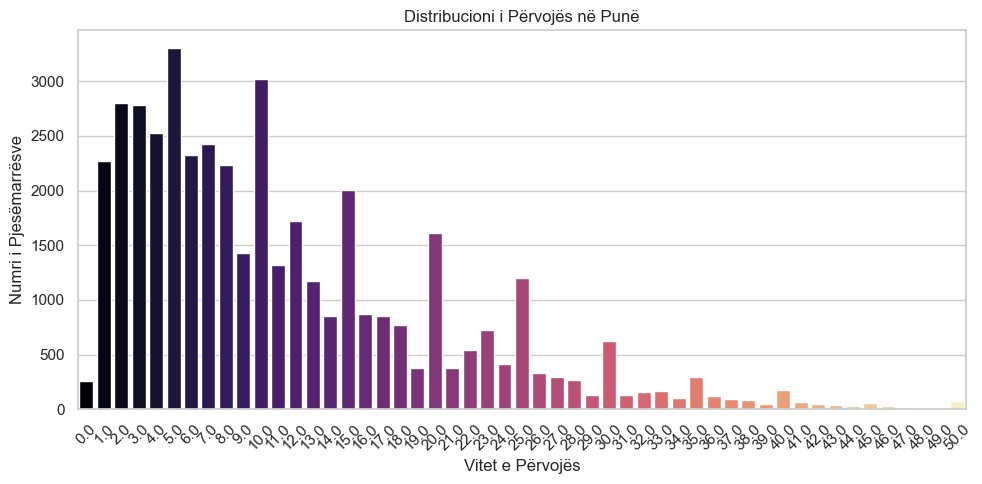

In [42]:
plt.figure(figsize=(10, 5))
workexp_counts = df['WorkExp'].value_counts().sort_index()
sns.barplot(x=workexp_counts.index.astype(str), y=workexp_counts.values, palette='magma')
plt.title("Distribucioni i Përvojës në Punë")
plt.xlabel("Vitet e Përvojës")
plt.ylabel("Numri i Pjesëmarrësve")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analiza e Përvojës në Punë (WorkExp)
Ky vizualizim paraqet shpërndarjen e pjesëmarrësve sipas viteve të përvojës në punë. Fillimisht, kemi numëruar se sa pjesëmarrës ka për secilën vlerë të ndryshme të përvojës (value_counts()), dhe më pas i kemi vizualizuar këto të dhëna me një grafik me kolona (barplot).

## Rezultatet:

* Shumica e pjesëmarrësve kanë 1 deri në 10 vite përvojë, që tregon dominimin e zhvilluesve relativisht të rinj në treg.

* Numri i individëve bie gradualisht me rritjen e viteve të përvojës.

* Ka më pak persona me përvojë shumë të gjatë (20+ vite), që është e pritshme për një industri relativisht të re si teknologjia.

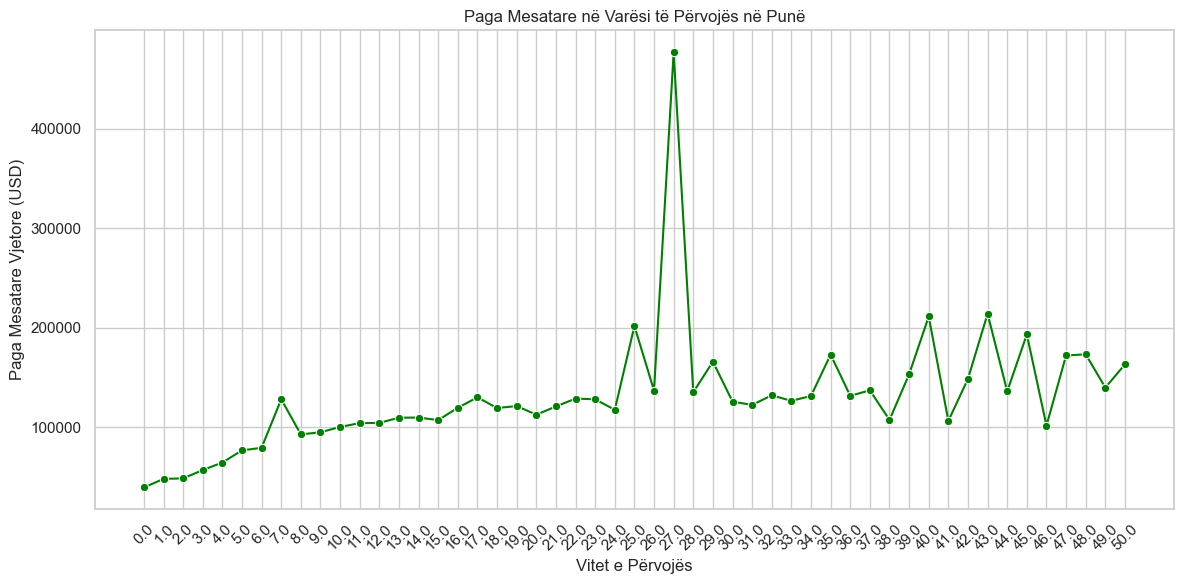

In [43]:
plt.figure(figsize=(12, 6))
workexp_salary = df.groupby('WorkExp')['ConvertedCompYearly'].mean().dropna()
workexp_salary = workexp_salary[workexp_salary.index.notna()]  # heq NaN
sns.lineplot(x=workexp_salary.index.astype(str), y=workexp_salary.values, marker='o', color='green')
plt.title("Paga Mesatare në Varësi të Përvojës në Punë")
plt.xlabel("Vitet e Përvojës")
plt.ylabel("Paga Mesatare Vjetore (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Paga Mesatare në Varësi të Përvojës në Punë
Ky grafik paraqet lidhjen mes përvojës në punë dhe pagës mesatare vjetore në fushën e teknologjisë.

## Çfarë kemi bërë:
Është llogaritur paga mesatare vjetore për çdo nivel të përvojës (WorkExp) duke përdorur funksionin groupby.

Janë hequr vlerat NaN për të shmangur shtrembërime në grafik.

Është krijuar një grafik vijor që tregon se si ndryshon paga me rritjen e përvojës në vite.

## Rezultatet:
Në përgjithësi, paga rritet me rritjen e përvojës në punë.

Rritja nuk është gjithmonë lineare – në disa pika, duket se ka plateau ose ulje, që mund të lidhen me faktorë si pozita gjeografike, roli profesional apo lloji i kompanisë.

Kjo analizë ndihmon për të kuptuar se përvoja ndikon në nivelin e të ardhurave, por jo në mënyrë të thjeshtë dhe të njëtrajtshme për të gjithë.

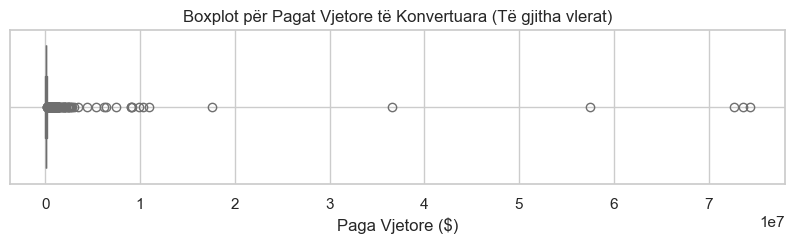

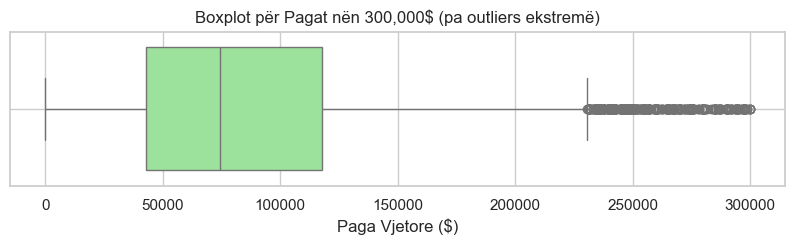

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

salary_data = df[['ConvertedCompYearly']].dropna()

plt.figure(figsize=(10, 2))
sns.boxplot(x=salary_data['ConvertedCompYearly'], color='skyblue')
plt.title('Boxplot për Pagat Vjetore të Konvertuara (Të gjitha vlerat)')
plt.xlabel('Paga Vjetore ($)')
plt.grid(True)
plt.show()

filtered_salary_data = salary_data[salary_data['ConvertedCompYearly'] < 300000]

plt.figure(figsize=(10, 2))
sns.boxplot(x=filtered_salary_data['ConvertedCompYearly'], color='lightgreen')
plt.title('Boxplot për Pagat nën 300,000$ (pa outliers ekstremë)')
plt.xlabel('Paga Vjetore ($)')
plt.grid(True)
plt.show()

In [ ]:
df = df[df['ConvertedCompYearly'] < 300000]

print("Përmbledhje statistikore pas filtrimit:")
print(df['ConvertedCompYearly'].describe())

Përmbledhje statistikore pas filtrimit:
count     46841.000000
mean      85206.061271
std       58578.185701
min           1.000000
25%       42836.000000
50%       74351.000000
75%      117931.000000
max      299851.000000
Name: ConvertedCompYearly, dtype: float64


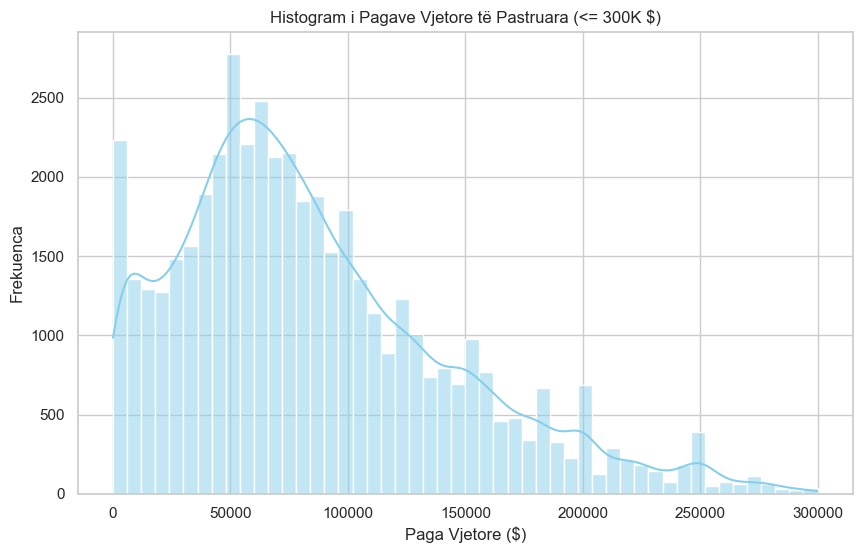

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, color='skyblue')
plt.title('Histogram i Pagave Vjetore të Pastruara (<= 300K $)')
plt.xlabel('Paga Vjetore ($)')
plt.ylabel('Frekuenca')
plt.show()

C:\Users\oltih2\AppData\Local\Temp\ipykernel_20584\3960952087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries, palette='Set2')


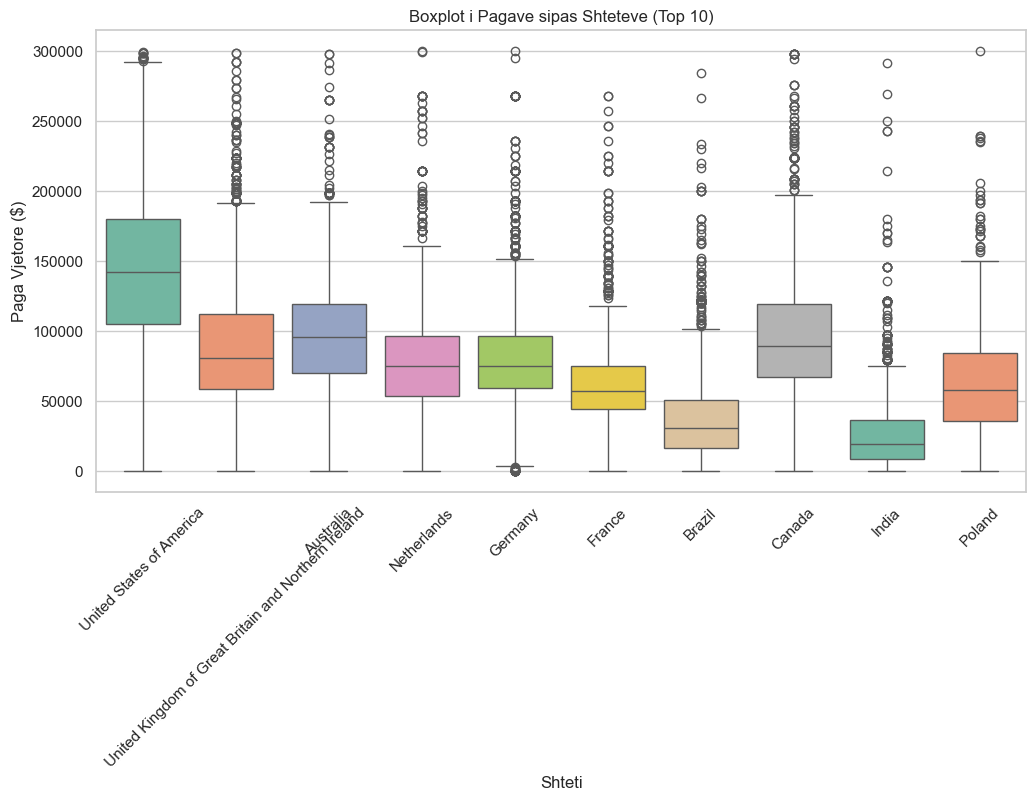

In [ ]:
top_countries = df['Country'].value_counts().head(10).index

df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries, palette='Set2')
plt.xticks(rotation=45)
plt.title('Boxplot i Pagave sipas Shteteve (Top 10)')
plt.ylabel('Paga Vjetore ($)')
plt.xlabel('Shteti')
plt.show()

C:\Users\oltih2\AppData\Local\Temp\ipykernel_13512\2071049269.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='KategoriaPage', palette='coolwarm')


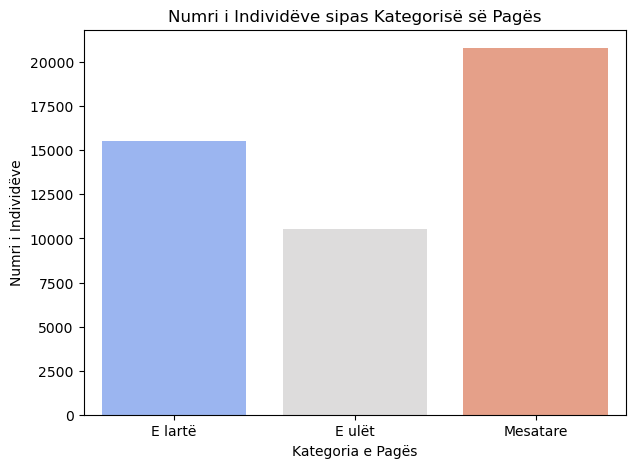

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("survey_results_public.csv")

df = df[df['ConvertedCompYearly'] < 300000]

def kategoria_page(paga):
    if paga < 40000:
        return 'E ulët'
    elif paga < 100000:
        return 'Mesatare'
    else:
        return 'E lartë'

df.loc[:, 'KategoriaPage'] = df['ConvertedCompYearly'].apply(kategoria_page)

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='KategoriaPage', palette='coolwarm')
plt.title('Numri i Individëve sipas Kategorisë së Pagës')
plt.xlabel('Kategoria e Pagës')
plt.ylabel('Numri i Individëve')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

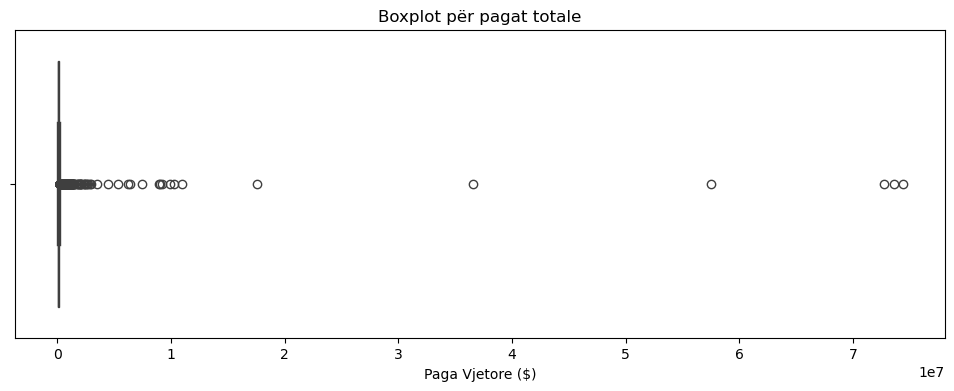

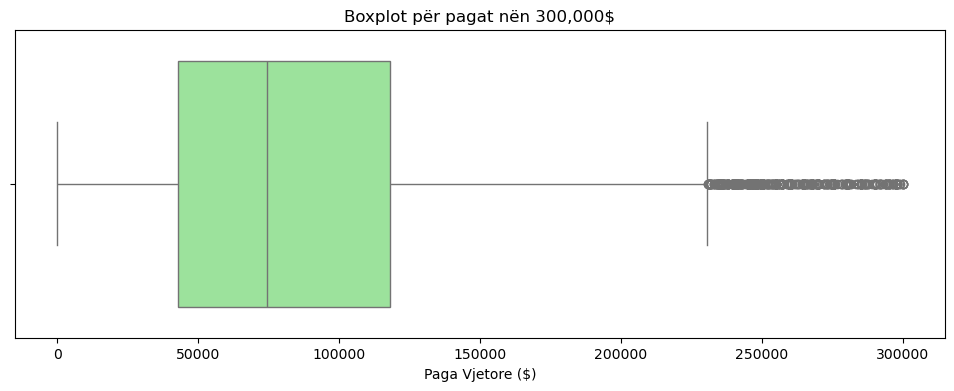

count     46841.000000
mean      85206.061271
std       58578.185701
min           1.000000
25%       42836.000000
50%       74351.000000
75%      117931.000000
max      299851.000000
Name: ConvertedCompYearly, dtype: float64


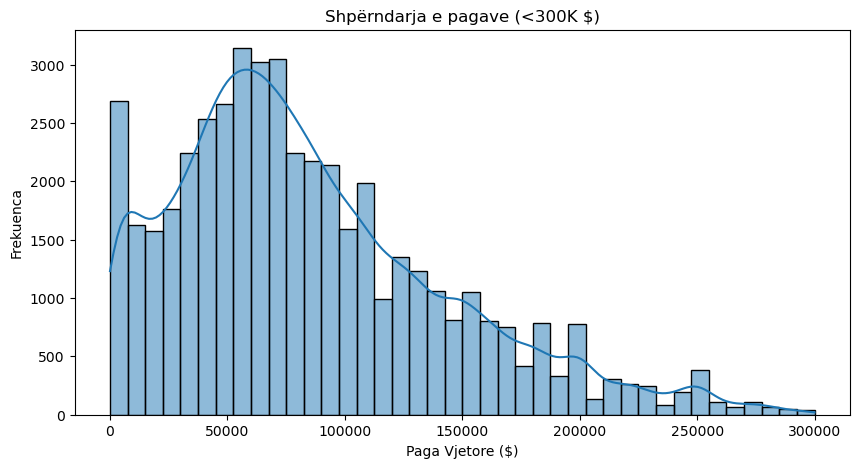

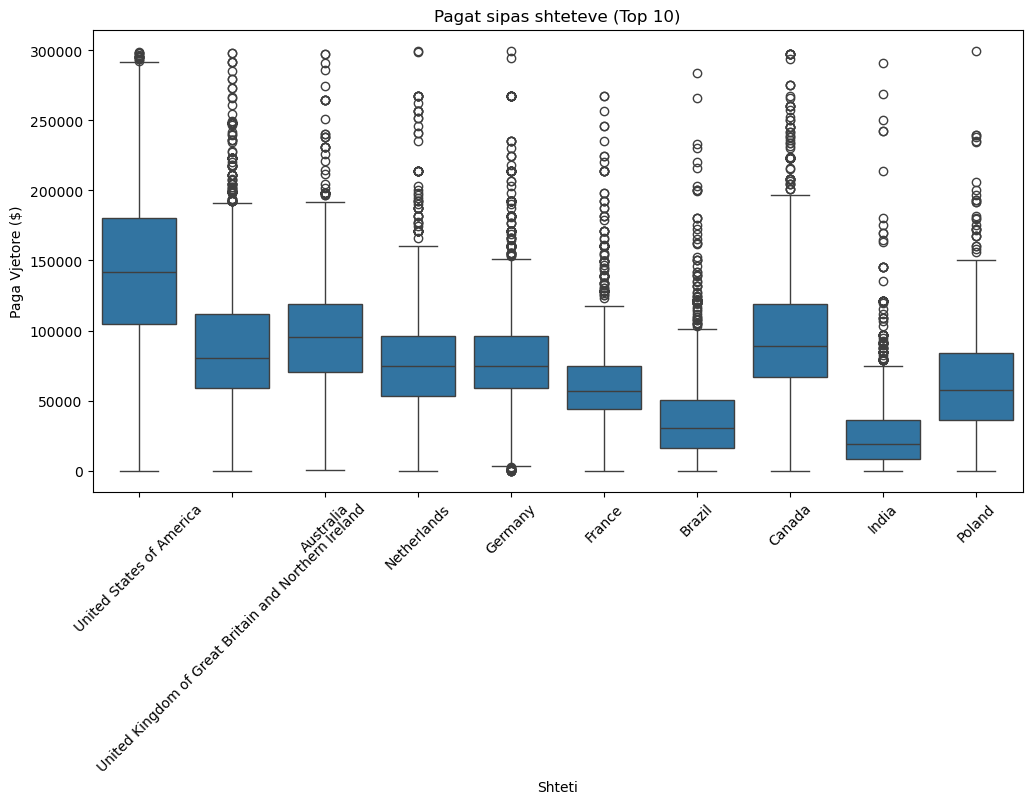

C:\Users\oltih2\AppData\Local\Temp\ipykernel_13512\1501430095.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KategoriaPage', data=df, palette='Set2')


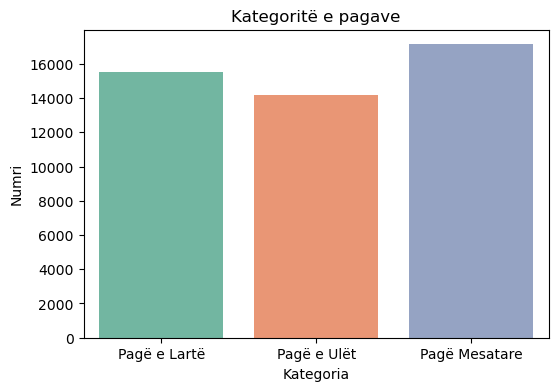

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("survey_results_public.csv")

print(df.info())
print(df['ConvertedCompYearly'].describe())

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

plt.figure(figsize=(12, 4))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title("Boxplot për pagat totale")
plt.xlabel("Paga Vjetore ($)")
plt.show()

filtered_salaries = df[df['ConvertedCompYearly'] < 300000]
plt.figure(figsize=(12, 4))
sns.boxplot(x=filtered_salaries['ConvertedCompYearly'], color="lightgreen")
plt.title("Boxplot për pagat nën 300,000$")
plt.xlabel("Paga Vjetore ($)")
plt.show()

df = df[df['ConvertedCompYearly'] < 300000]

print(df['ConvertedCompYearly'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['ConvertedCompYearly'], bins=40, kde=True)
plt.title("Shpërndarja e pagave (<300K $)")
plt.xlabel("Paga Vjetore ($)")
plt.ylabel("Frekuenca")
plt.show()

top_countries = df['Country'].value_counts().head(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries)
plt.xticks(rotation=45)
plt.title("Pagat sipas shteteve (Top 10)")
plt.ylabel("Paga Vjetore ($)")
plt.xlabel("Shteti")
plt.show()

def kategorizo_pagat(paga):
    if paga < 50000:
        return "Pagë e Ulët"
    elif paga < 100000:
        return "Pagë Mesatare"
    else:
        return "Pagë e Lartë"

df['KategoriaPage'] = df['ConvertedCompYearly'].apply(kategorizo_pagat)

plt.figure(figsize=(6, 4))
sns.countplot(x='KategoriaPage', data=df, palette='Set2')
plt.title("Kategoritë e pagave")
plt.xlabel("Kategoria")
plt.ylabel("Numri")
plt.show()

df['IsHighIncome'] = df['ConvertedCompYearly'] > 100000

# Veçori Binare për Paga të Lartë
Kjo pjesë e analizës shton një kolonë të re që ndan pjesëmarrësit në dy grupe: ata me pagë të lartë dhe ata me pagë më të ulët.

## Çfarë kemi bërë:
Është krijuar një veçori binare e quajtur IsHighIncome.

Për çdo rresht në dataset, nëse ConvertedCompYearly (paga vjetore) është më e madhe se 100,000 USD, atëherë IsHighIncome = True.

Përndryshe, IsHighIncome = False.

## Rezultatet:
Kjo veçori ndihmon për të segmentuar pjesëmarrësit në dy kategori të thjeshta: ata me të ardhura të larta dhe ata me të ardhura më të ulëta.

Veçoria është shumë e dobishme për analiza krahasuese, si:

Cilat vende kanë më shumë persona me të ardhura të larta?

A ndikon përvoja ose niveli i edukimit në probabilitetin për të qenë IsHighIncome = True?

A ka lidhje gjinia apo sektori i punës me të ardhurat?

Për më tepër, kjo fushë mund të përdoret në modele parashikuese, si p.sh. klasifikimi i përdoruesve në bazë të profileve të tyre për të parashikuar nëse do kenë të ardhura të larta.

## Interpretimi për analizat e ardhshme:
Krijimi i kësaj veçorie është hap i rëndësishëm drejt modelimit, sepse përkthen një vlerë të vazhduar (numerike) në kategori binare, të lehta për interpretim dhe krahasim.

Për shembull, mund të ndërtojmë grafikë për:

* Përqindjen e të ardhurave të larta sipas vendit.

* Marrëdhënien mes IsHighIncome dhe veçorive si YearsCode, EdLevel, apo Employment.